### Author: Maxim Shmakov

In [1]:
from sys import executable
!{executable} -m pip install numpy pandas seaborn scipy matplotlib sklearn statsmodels

In [2]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import kstest
from collections import Counter
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(context='notebook')
pd.set_option('display.float_format', lambda x: f'{x :.2f}')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Task 1

In [4]:
df_iter = pd.read_stata("./World_data.dta", iterator=True)
df_iter.variable_labels()

{'country': '',
 'populatn': 'Population in thousands',
 'density': 'Number of people / sq. kilometer',
 'urban': 'People living in cities (%)',
 'religion': 'Predominant religion',
 'lifeexpf': 'Average female life expectancy',
 'lifeexpm': 'Average male life expectancy',
 'literacy': 'People who read (%)',
 'pop_incr': 'Population increase (% per year))',
 'babymort': 'Infant mortality (deaths per 1000 live births)',
 'gdp_cap': 'Gross domestic product / capita',
 'region': 'Region or economic group',
 'calories': 'Daily calorie intake',
 'aids': 'Aids cases',
 'birth_rt': 'Birth rate per 1000 people',
 'death_rt': 'Death rate per 1000 people',
 'aids_rt': 'Number of aids cases / 100000 people',
 'log_gdp': 'Log (base 10) of GDP_CAP',
 'lg_aidsr': 'Log (base 10) of AIDS_RT',
 'b_to_d': 'Birth to death ratio',
 'fertilty': 'Fertility: average number of kids',
 'log_pop': 'Log (base 10) of Population',
 'cropgrow': '',
 'lit_male': 'Males who read (%)',
 'lit_fema': 'Females who read (

In [5]:
df = pd.read_stata("./World_data.dta")
df

,country,populatn,density,urban,religion,lifeexpf,lifeexpm,literacy,pop_incr,babymort,...,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,climate
0,Afghanistan,20500.00,25.00,18.00,Muslim,44.00,45.00,29.00,2.80,168.00,...,0.00,2.31,0.00,2.41,6.90,4.31,12.00,44.00,14.00,arid
1,Argentina,33900.00,12.00,86.00,Catholic,75.00,68.00,95.00,1.30,25.60,...,11.52,3.53,1.63,2.22,2.80,4.53,9.00,96.00,95.00,temperate
2,Armenia,3700.00,126.00,68.00,Orthodox,75.00,68.00,98.00,1.40,27.00,...,0.05,3.70,0.56,3.83,3.19,3.57,17.00,100.00,100.00,NaN
3,Australia,17800.00,2.30,85.00,Protstnt,80.00,74.00,100.00,1.38,7.30,...,26.56,4.23,1.93,1.88,1.90,4.25,6.00,100.00,100.00,arid
4,Austria,8000.00,94.00,58.00,Catholic,79.00,73.00,99.00,0.20,6.70,...,14.38,4.26,1.70,1.09,1.50,3.90,17.00,nan,nan,temperate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Uruguay,3200.00,18.00,89.00,Catholic,77.00,71.00,96.00,0.80,17.00,...,14.66,3.50,1.71,1.70,2.44,3.51,8.00,97.00,96.00,temperate
105,Uzbekistan,22600.00,50.00,41.00,Muslim,72.00,65.00,97.00,2.13,53.00,...,0.01,3.13,0.39,4.29,3.73,4.35,10.00,100.00,100.00,arid / desert
106,Venezuela,20600.00,22.00,91.00,Catholic,76.00,70.00,88.00,2.16,28.00,...,16.48,3.45,1.75,5.20,3.05,4.31,3.00,90.00,87.00,tropical
107,Vietnam,73100.00,218.00,20.00,Buddhist,68.00,63.00,88.00,1.78,46.00,...,0.15,2.36,0.68,3.38,3.33,4.86,22.00,93.00,83.00,tropical


In [6]:
print('Dimension of dataset: {}'.format(df.shape))
df.dtypes

Dimension of dataset: (109, 26)


country       object
populatn     float64
density      float64
urban        float64
religion      object
lifeexpf     float64
lifeexpm     float64
literacy     float64
pop_incr     float64
babymort     float64
gdp_cap      float64
region      category
calories     float64
aids         float64
birth_rt     float64
death_rt     float64
aids_rt      float64
log_gdp      float64
lg_aidsr     float64
b_to_d       float64
fertilty     float64
log_pop      float64
cropgrow     float64
lit_male     float64
lit_fema     float64
climate     category
dtype: object

In [7]:
df.fillna(df.mean(), inplace=True)
print(df.isna().sum())
df.head()

country     0
populatn    0
density     0
urban       0
religion    0
lifeexpf    0
lifeexpm    0
literacy    0
pop_incr    0
babymort    0
gdp_cap     0
region      0
calories    0
aids        0
birth_rt    0
death_rt    0
aids_rt     0
log_gdp     0
lg_aidsr    0
b_to_d      0
fertilty    0
log_pop     0
cropgrow    0
lit_male    0
lit_fema    0
climate     2
dtype: int64


,country,populatn,density,urban,religion,lifeexpf,lifeexpm,literacy,pop_incr,babymort,...,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,climate
0,Afghanistan,20500.00,25.00,18.00,Muslim,44.00,45.00,29.00,2.80,168.00,...,0.00,2.31,0.00,2.41,6.90,4.31,12.00,44.00,14.00,arid
1,Argentina,33900.00,12.00,86.00,Catholic,75.00,68.00,95.00,1.30,25.60,...,11.52,3.53,1.63,2.22,2.80,4.53,9.00,96.00,95.00,temperate
2,Armenia,3700.00,126.00,68.00,Orthodox,75.00,68.00,98.00,1.40,27.00,...,0.05,3.70,0.56,3.83,3.19,3.57,17.00,100.00,100.00,NaN
3,Australia,17800.00,2.30,85.00,Protstnt,80.00,74.00,100.00,1.38,7.30,...,26.56,4.23,1.93,1.88,1.90,4.25,6.00,100.00,100.00,arid
4,Austria,8000.00,94.00,58.00,Catholic,79.00,73.00,99.00,0.20,6.70,...,14.38,4.26,1.70,1.09,1.50,3.90,17.00,78.73,67.26,temperate


In [8]:
df.describe()

,populatn,density,urban,lifeexpf,lifeexpm,literacy,pop_incr,babymort,gdp_cap,calories,...,death_rt,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema
count,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00,...,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00,109.00
mean,47723.88,203.41,56.53,70.16,64.92,78.34,1.68,42.31,5859.98,2753.83,...,9.56,24.38,3.42,1.38,3.20,3.56,4.11,17.98,78.73,67.26
std,146726.36,675.71,24.09,10.57,9.27,22.67,1.20,38.08,6479.84,470.02,...,4.23,48.76,0.62,0.70,2.12,1.88,0.65,15.59,18.03,25.23
min,256.00,2.30,5.00,43.00,41.00,18.00,-0.30,4.00,122.00,1667.00,...,2.00,0.00,2.09,0.00,0.92,1.30,2.41,0.00,28.00,9.00
25%,5100.00,29.00,41.00,67.00,61.00,64.00,0.52,9.30,1000.00,2375.00,...,7.00,0.30,3.00,0.78,1.56,1.88,3.71,6.00,70.00,50.00
50%,10400.00,64.00,60.00,74.00,67.00,87.00,1.80,27.70,2995.00,2753.83,...,9.00,5.94,3.48,1.38,2.67,3.08,4.02,14.00,78.73,67.26
75%,35600.00,126.00,75.00,78.00,72.00,98.00,2.68,63.00,7467.00,3052.00,...,11.00,24.38,3.87,1.82,4.17,4.90,4.55,26.00,93.00,89.00
max,1205200.00,5494.00,100.00,82.00,76.00,100.00,5.24,168.00,23474.00,3825.00,...,24.00,326.75,4.37,3.18,14.00,8.19,6.08,77.00,100.00,100.00


In [9]:
df.describe(include=['O'])

,country,religion
count,109,109
unique,109,11
top,Uganda,Catholic
freq,1,41


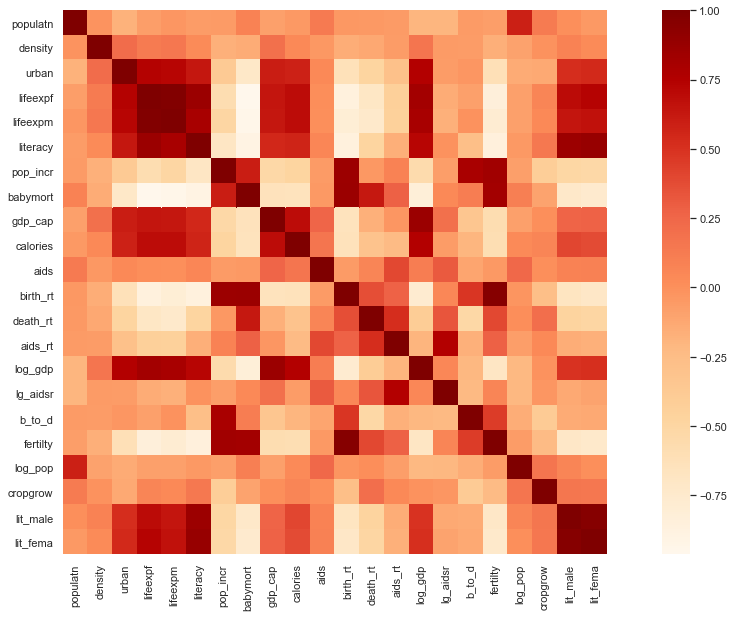

In [10]:
cor = df.corr()
sns.heatmap(cor, square = True, cmap='OrRd')

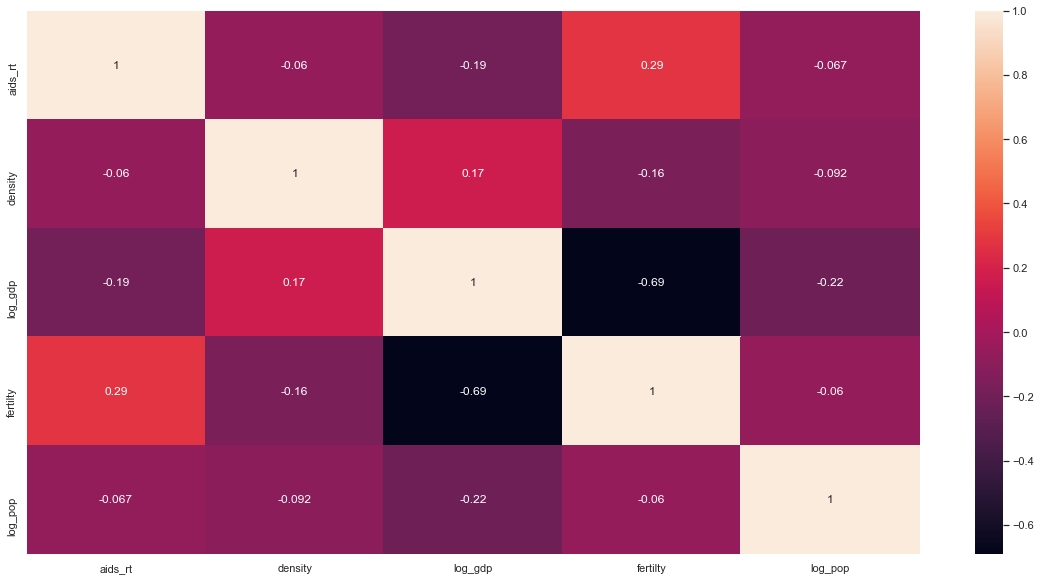

In [11]:
cols = ["aids_rt", "density", "log_gdp", "fertilty", "log_pop"]
sns.heatmap(df[cols].corr(), annot=True)

In [12]:
data = df[cols].copy()
data.head(2)

,aids_rt,density,log_gdp,fertilty,log_pop
0,0.00,25.00,2.31,6.90,4.31
1,11.52,12.00,3.53,2.80,4.53


In [13]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data.head()

,aids_rt,density,log_gdp,fertilty,log_pop
0,0.00,0.00,0.10,0.81,0.52
1,0.04,0.00,0.63,0.22,0.58
2,0.00,0.02,0.71,0.27,0.32
3,0.08,0.00,0.94,0.09,0.50
4,0.04,0.02,0.95,0.03,0.41


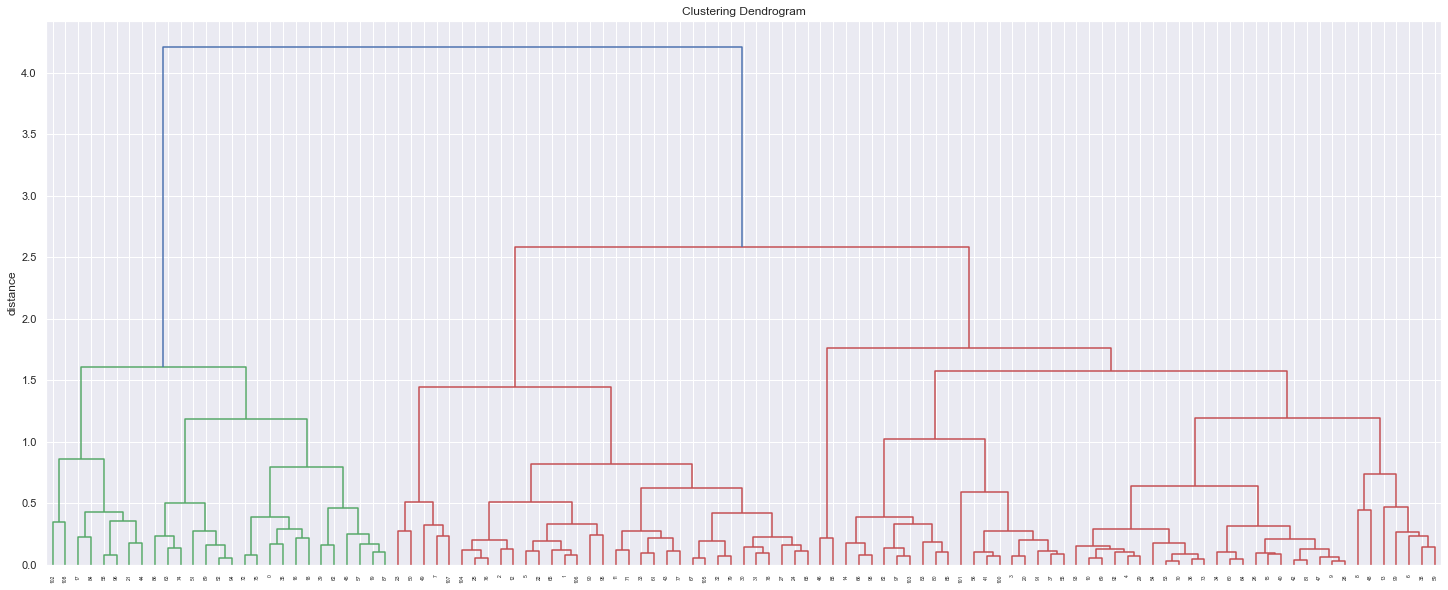

In [14]:
plt.figure(figsize=(25, 10))
plt.title('Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.ylabel('distance')
plt.show()

['aids_rt', 'density', 'log_gdp', 'fertilty', 'log_pop']


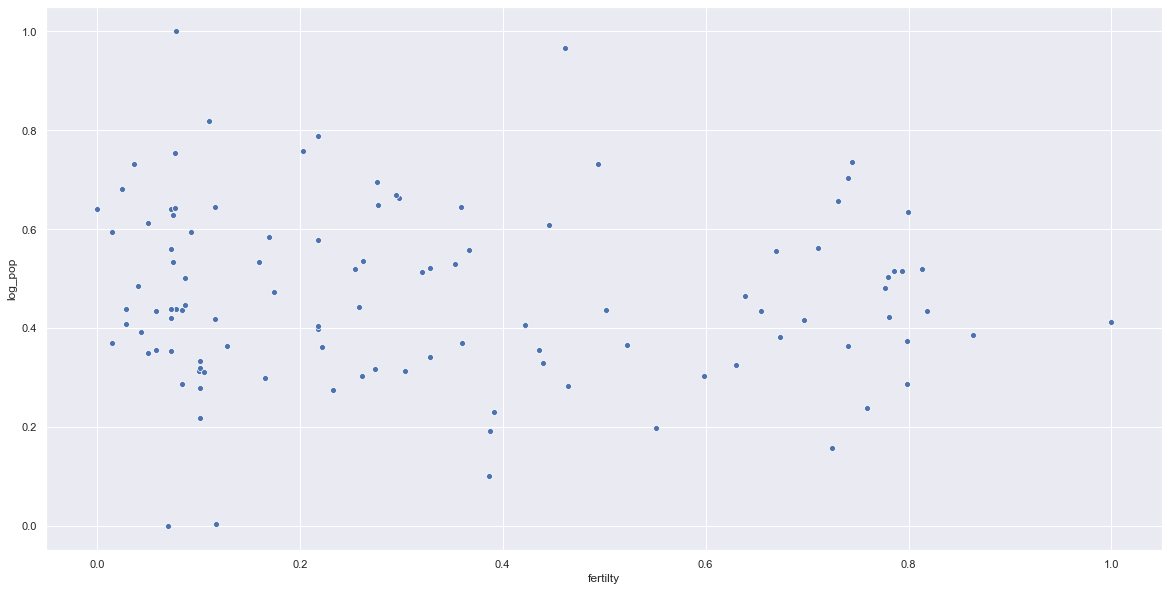

In [15]:
print(cols)
sns.scatterplot(x='fertilty', y='log_pop', data=data)

In [16]:
kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(data)

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

df['kmeans'] = predicted
df.head()

,country,populatn,density,urban,religion,lifeexpf,lifeexpm,literacy,pop_incr,babymort,...,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,climate,kmeans
0,Afghanistan,20500.00,25.00,18.00,Muslim,44.00,45.00,29.00,2.80,168.00,...,2.31,0.00,2.41,6.90,4.31,12.00,44.00,14.00,arid,2
1,Argentina,33900.00,12.00,86.00,Catholic,75.00,68.00,95.00,1.30,25.60,...,3.53,1.63,2.22,2.80,4.53,9.00,96.00,95.00,temperate,0
2,Armenia,3700.00,126.00,68.00,Orthodox,75.00,68.00,98.00,1.40,27.00,...,3.70,0.56,3.83,3.19,3.57,17.00,100.00,100.00,NaN,1
3,Australia,17800.00,2.30,85.00,Protstnt,80.00,74.00,100.00,1.38,7.30,...,4.23,1.93,1.88,1.90,4.25,6.00,100.00,100.00,arid,1
4,Austria,8000.00,94.00,58.00,Catholic,79.00,73.00,99.00,0.20,6.70,...,4.26,1.70,1.09,1.50,3.90,17.00,78.73,67.26,temperate,1


In [17]:
df[df.kmeans == 0].describe()

,populatn,density,urban,lifeexpf,lifeexpm,literacy,pop_incr,babymort,gdp_cap,calories,...,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,kmeans
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,95540.83,112.41,52.86,70.94,65.67,80.94,1.81,42.39,1707.28,2623.29,...,7.84,3.12,1.16,3.87,3.22,4.41,18.11,84.45,75.74,0.00
std,243558.65,143.82,19.58,5.73,4.95,16.05,0.65,21.86,1052.68,330.84,...,9.66,0.34,0.54,1.34,0.83,0.64,16.02,13.19,19.90,0.00
min,2600.00,6.90,16.00,53.00,53.00,35.00,0.05,10.20,202.00,1916.00,...,0.00,2.31,0.00,0.92,1.82,3.41,3.00,47.00,22.00,0.00
25%,7875.00,33.75,42.50,67.75,62.75,77.75,1.55,25.60,966.75,2348.50,...,0.19,2.98,0.71,3.12,2.77,3.90,6.75,78.73,67.81,0.00
50%,23250.00,71.50,52.00,72.00,66.00,86.50,1.94,40.25,1405.50,2750.50,...,2.93,3.15,1.24,3.86,3.16,4.37,12.00,88.00,81.00,0.00
75%,60550.00,117.25,67.75,75.00,69.00,93.00,2.14,52.62,2618.75,2753.83,...,11.99,3.42,1.59,4.46,3.77,4.78,23.00,93.00,90.00,0.00
max,1205200.00,800.00,91.00,79.00,76.00,99.00,2.70,106.00,3721.00,3336.00,...,31.49,3.57,1.99,7.33,4.76,6.08,67.00,100.00,100.00,0.00


In [18]:
df[df.kmeans == 1].describe()

,populatn,density,urban,lifeexpf,lifeexpm,literacy,pop_incr,babymort,gdp_cap,calories,...,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,kmeans
count,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,...,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00
mean,25786.38,362.86,73.15,77.89,71.29,93.92,0.78,13.27,11942.53,3079.55,...,18.75,4.01,1.41,2.18,2.10,3.93,20.80,86.66,79.12,1.00
std,47896.31,1027.45,14.99,3.86,4.31,9.38,1.08,14.05,5938.12,388.29,...,32.39,0.25,0.59,2.38,0.77,0.67,17.11,11.18,15.97,0.00
min,256.00,2.30,34.00,58.00,52.00,61.00,-0.30,4.00,3131.00,2383.00,...,0.04,3.50,0.52,0.92,1.30,2.41,0.00,55.00,48.00,1.00
25%,3600.00,36.00,63.00,76.00,69.00,93.00,0.21,6.60,6680.00,2753.83,...,0.52,3.82,0.88,1.17,1.65,3.56,7.00,78.73,67.26,1.00
50%,8000.00,94.00,73.00,79.00,73.00,99.00,0.47,8.20,13047.00,2956.00,...,8.81,4.12,1.54,1.40,1.84,3.90,17.98,78.73,67.26,1.00
75%,20944.00,227.00,85.00,80.00,74.00,99.00,0.92,17.00,17245.00,3465.00,...,19.84,4.24,1.79,2.00,2.06,4.32,31.00,99.00,98.00,1.00
max,260800.00,5494.00,100.00,82.00,76.00,100.00,5.24,94.00,23474.00,3825.00,...,157.94,4.37,2.75,14.00,4.50,5.42,77.00,100.00,100.00,1.00


In [19]:
df[df.kmeans == 2].describe()

,populatn,density,urban,lifeexpf,lifeexpm,literacy,pop_incr,babymort,gdp_cap,calories,...,aids_rt,log_gdp,lg_aidsr,b_to_d,fertilty,log_pop,cropgrow,lit_male,lit_fema,kmeans
count,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,...,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00,28.00
mean,21501.64,64.17,34.54,56.71,53.71,49.94,2.96,88.89,1423.64,2398.18,...,54.68,2.85,1.61,3.99,6.37,4.03,13.29,58.63,37.29,2.00
std,30247.48,75.15,21.88,9.61,9.13,18.13,0.47,34.68,1997.04,406.70,...,79.44,0.49,0.94,1.83,0.68,0.53,11.26,17.44,18.87,0.00
min,959.00,2.40,5.00,43.00,41.00,18.00,1.63,34.00,122.00,1667.00,...,0.00,2.09,0.00,2.04,4.90,2.98,1.00,28.00,9.00,2.00
25%,5575.00,21.50,17.25,49.25,45.75,35.00,2.78,62.25,315.25,2134.00,...,0.18,2.50,0.71,2.52,5.93,3.75,3.00,46.25,19.75,2.00
50%,9550.00,42.50,30.50,56.00,54.00,50.50,2.98,93.00,433.00,2300.00,...,17.28,2.64,1.75,3.56,6.42,3.98,12.00,62.00,38.50,2.00
75%,20050.00,74.50,45.50,66.25,62.75,64.00,3.23,112.25,1613.75,2753.83,...,103.70,3.20,2.53,5.34,6.78,4.30,20.75,73.50,49.25,2.00
max,128100.00,311.00,82.00,74.00,70.00,80.00,3.70,168.00,7467.00,3324.00,...,326.75,3.87,3.18,8.00,8.19,5.11,43.00,89.00,71.00,2.00


# Task 2

In [20]:
df_2_iter = pd.read_stata("./Worldbank_data.dta", iterator=True)
df_2_iter.variable_labels()

{'year': 'Year',
 'groups': 'Groups of countries',
 'country_name': 'Country Name',
 'country_code': 'Country Code',
 'internet': 'Internet users (per 100 people)',
 'secure': 'Secure Internet servers (per 1 million people)',
 'export': 'Communications, computer, etc. (% of service exports)',
 'import': 'Communications, computer, etc. (% of service imports)',
 'telephone': 'Fixed telephone subscriptions (per 100 people)',
 'hightech': 'High-technology exports (current US$)',
 'mobile': 'Mobile cellular subscriptions (per 100 people)'}

In [21]:
df_2 = pd.read_stata("./Worldbank_data.dta")
df_2

,year,groups,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,2015.00,3.00,Afghanistan,AFG,8.26,1.41,72.65,9.05,0.34,nan,61.58
1,2015.00,2.00,Albania,ALB,63.25,37.73,25.30,11.12,7.09,15123662.00,106.38
2,2015.00,2.00,Algeria,DZA,38.20,2.55,59.26,58.01,8.04,2449466.00,113.03
3,2015.00,3.00,American Samoa,ASM,nan,72.02,nan,nan,18.01,nan,nan
4,2015.00,1.00,Andorra,ADO,96.91,1631.83,nan,nan,47.99,nan,88.12
...,...,...,...,...,...,...,...,...,...,...,...
212,2015.00,2.00,Virgin Islands (U.S.),VIR,54.84,453.78,nan,nan,71.09,nan,nan
213,2015.00,2.00,West Bank and Gaza,WBG,57.42,5.65,44.17,nan,8.94,5099724.00,77.62
214,2015.00,3.00,"Yemen, Rep.",YEM,25.10,0.63,56.46,nan,4.68,2946931.00,67.98
215,2015.00,3.00,Zambia,ZMB,21.00,4.32,8.55,nan,0.75,36503179.00,74.47


In [22]:
df_2.isna().sum()

year             0
groups           0
country_name     0
country_code     0
internet        15
secure          10
export          73
import          94
telephone        8
hightech        82
mobile          13
dtype: int64

In [23]:
df_2 = df_2.drop(columns=['import', 'hightech', 'country_name', 'country_code'])

In [24]:
df_2.fillna(df_2.mean(), inplace=True)
print(df_2.isna().sum())
df_2.head()

year         0
groups       0
internet     0
secure       0
export       0
telephone    0
mobile       0
dtype: int64


,year,groups,internet,secure,export,telephone,mobile
0,2015.00,3.00,8.26,1.41,72.65,0.34,61.58
1,2015.00,2.00,63.25,37.73,25.30,7.09,106.38
2,2015.00,2.00,38.20,2.55,59.26,8.04,113.03
3,2015.00,3.00,48.57,72.02,35.12,18.01,107.72
4,2015.00,1.00,96.91,1631.83,35.12,47.99,88.12


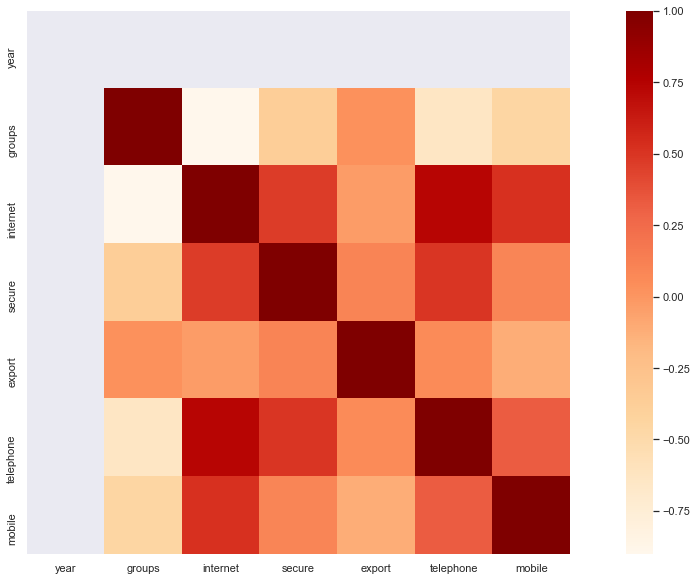

In [25]:
cor_2 = df_2.corr()
sns.heatmap(cor_2, square = True, cmap='OrRd')

In [26]:
df_2 = df_2.drop(columns=['year', 'groups', 'export'])

In [27]:
scaler = MinMaxScaler()
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2.head()

,internet,secure,telephone,mobile
0,0.07,0.00,0.00,0.17
1,0.64,0.00,0.06,0.31
2,0.38,0.00,0.06,0.33
3,0.49,0.01,0.14,0.32
4,0.99,0.16,0.37,0.26


In [28]:
formula_str = 'internet ~ ' + ' + '.join(df_2.columns.drop('internet'))

model = sm.ols(formula=formula_str, data=df_2)
fitted = model.fit()

fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               internet   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sat, 23 May 2020   Prob (F-statistic):           5.66e-48
Time:                        15:55:00   Log-Likelihood:                 75.823
No. Observations:                 217   AIC:                            -143.6
Df Residuals:                     213   BIC:                            -130.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0769      0.031      2.468      0.014       0.015       0.138
secure         0.4280      0.125      3.430      0.001       0.182       0.674
telephone      1.1202      0.102     11.012      0.000       0.920       1.321
mobile         0.7305      0.096      7.600      0.000       0.541       0.920
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.573
Skew:                          -0.080   Prob(JB):                        0.751
Kurtosis:                       3.194   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.642    
Dependent Variable: internet         AIC:                -143.6459
Date:               2020-05-23 15:55 BIC:                -130.1263
No. Observations:   217              Log-Likelihood:     75.823   
Df Model:           3                F-statistic:        130.4    
Df Residuals:       213              Prob (F-statistic): 5.66e-48 
R-squared:          0.647            Scale:              0.029656 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     0.0769     0.0312    2.4683   0.0144   0.0155   0.1384
secure        0.4280     0.1248    3.4302   0.0007   0.1821   0.6740
telephone     1.1202     0.1017   11.0118   0.0000   0.9197   1.3208
mobile        0.7305     0.0961    7.5999   0.0000   0.5411   0.9200
------------------------------------------------------------------
Omnibus:              0.873         Durbin-Watson:           1.875
Prob(Omnibus):        0.646         Jarque-Bera (JB):        0.573
Skew:                 -0.080        Prob(JB):                0.751
Kurtosis:             3.194         Condition No.:           13   
==================================================================

"""

In [30]:
coefs = pd.DataFrame()
coefs['Coefs'] = fitted.params[1:]
coefs['Features'] = fitted.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', fitted.params[0])
coefs

Intercept =  0.076925969755501


,Coefs
Features,
secure,0.43
telephone,1.12
mobile,0.73


In [31]:
print('Z = {:3f} + {}'
      .format(fitted.params[0], ' + '.join(
          ['{:.3f}*{}'.format(param, index) for (param, index) in zip(fitted.params[1:], fitted.params.index[1:])]
      )))

Z = 0.076926 + 0.428*secure + 1.120*telephone + 0.731*mobile


In [32]:
from scipy import stats
np.random.seed(12345678)
stats.shapiro(df_2['internet'])[1]

1.7253462374355877e-06

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifs = [vif(fitted.model.exog, i) for i in range(fitted.model.exog.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = df_2.columns[1:]
vif_df

,VIF,Features
0,1.34,secure
1,1.49,telephone
2,1.12,mobile


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_2.values, i) for i in range(df_2.shape[1])]
vif["features"] = df_2.columns
vif

,VIF Factor,features
0,10.72,internet
1,1.66,secure
2,4.76,telephone
3,5.68,mobile


In [36]:
df_2_iter = pd.read_stata("./telco.dta", iterator=True)
df_2_iter.variable_labels()

{'region': 'Geographic indicator',
 'tenure': 'Months with service',
 'age': 'Age in years',
 'marital': 'Marital status',
 'address': 'Years at current address',
 'income': 'Household income in thousands',
 'ed': 'Level of education',
 'employ': 'Years with current employer',
 'retire': 'Retired',
 'gender': 'Gender',
 'reside': 'Number of people in household',
 'tollfree': 'Toll free service',
 'equip': 'Equipment rental',
 'callcard': 'Calling card service',
 'wireless': 'Wireless service',
 'longmon': 'Long distance last month',
 'tollmon': 'Toll free last month',
 'equipmon': 'Equipment last month',
 'cardmon': 'Calling card last month',
 'wiremon': 'Wireless last month',
 'longten': 'Long distance over tenure',
 'tollten': 'Toll free over tenure',
 'equipten': 'Equipment over tenure',
 'cardten': 'Calling card over tenure',
 'wireten': 'Wireless over tenure',
 'multline': 'Multiple lines',
 'voice': 'Voice mail',
 'pager': 'Paging service',
 'internet': 'Internet',
 'callid': 'Ca

In [37]:
df_2 = pd.read_stata("./telco.dta")
df_2

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13.00,44.00,Married,9.00,64.00,College degree,5.00,No,Male,...,No,No,1.31,nan,nan,2.01,nan,4.16,Basic service,Yes
1,Zone 3,11.00,33.00,Married,7.00,136.00,Post-undergraduate degree,5.00,No,Male,...,Yes,No,1.48,3.03,nan,2.72,3.58,4.91,Total service,Yes
2,Zone 3,68.00,52.00,Married,24.00,116.00,Did not complete high school,29.00,No,Female,...,Yes,No,2.90,2.89,nan,3.41,nan,4.75,Plus service,No
3,Zone 2,33.00,33.00,Unmarried,12.00,33.00,High school degree,0.00,No,Female,...,No,No,2.25,nan,nan,nan,nan,3.50,Basic service,Yes
4,Zone 2,23.00,30.00,Married,9.00,30.00,Did not complete high school,2.00,No,Male,...,Yes,No,1.84,nan,nan,nan,nan,3.40,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10.00,39.00,Unmarried,0.00,27.00,Some college,0.00,No,Female,...,No,Yes,1.10,nan,3.37,nan,nan,3.30,Basic service,No
996,Zone 1,7.00,34.00,Unmarried,2.00,22.00,Post-undergraduate degree,5.00,No,Female,...,No,No,1.54,nan,3.24,nan,nan,3.09,Basic service,No
997,Zone 3,67.00,59.00,Unmarried,40.00,944.00,Post-undergraduate degree,33.00,No,Female,...,Yes,Yes,3.29,3.47,4.00,3.58,4.19,6.85,Total service,No
998,Zone 3,70.00,49.00,Unmarried,18.00,87.00,High school degree,22.00,No,Female,...,Yes,No,3.24,3.51,nan,3.23,nan,4.47,Plus service,No


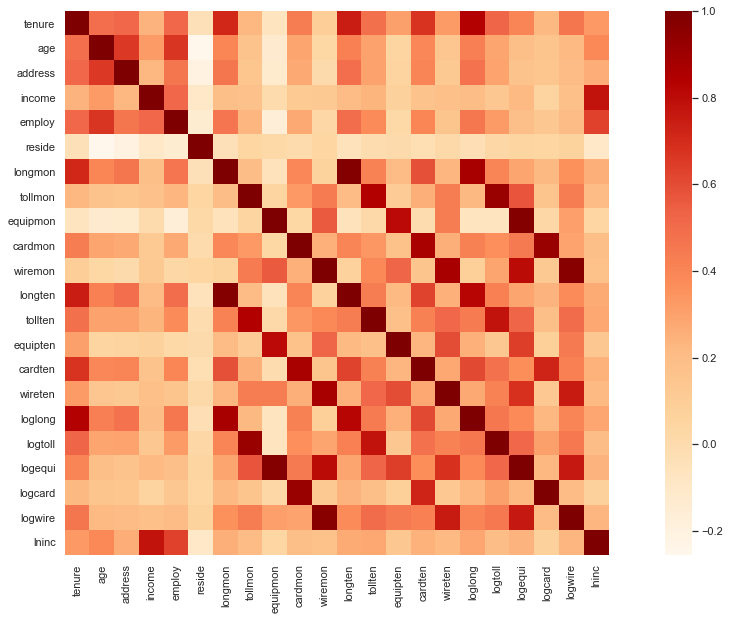

In [38]:
cor_2 = df_2.corr()
sns.heatmap(cor_2, square = True, cmap='OrRd')

In [39]:
df_2 = df_2[['callwait', 'forward', 'confer', 'ebill']]

In [40]:
df_2 = pd.get_dummies(df_2, prefix=['callwait', 'forward', 'confer', 'ebill'], 
                              columns = ['callwait', 'forward', 'confer', 'ebill'])

df_2 = df_2.drop(columns=['callwait_No', 'forward_No', 'confer_No', 'ebill_No']).copy()
df_2.rename(columns={'callwait_Yes': 'callwait', 'forward_Yes': 'forward', 'confer_Yes':'confer', 'ebill_Yes':'ebill'}, inplace=True)

df_2.head()

,callwait,forward,confer,ebill
0,0,1,0,0
1,1,1,1,0
2,1,0,1,0
3,0,0,0,0
4,0,1,1,0


In [41]:
df_2.fillna(df_2.mean(), inplace=True)
print(df_2.isna().sum())
df_2.head()

scaler = MinMaxScaler()
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2.head()

formula_str = 'callwait ~ ' + ' + '.join(df_2.columns.drop('callwait'))

model = sm.logit(formula=formula_str, data=df_2)
fitted = model.fit()

fitted.summary()

callwait    0
forward     0
confer      0
ebill       0
dtype: int64
Optimization terminated successfully.
         Current function value: 0.435749
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               callwait   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.3709
Time:                        15:57:24   Log-Likelihood:                -435.75
converged:                       True   LL-Null:                       -692.70
Covariance Type:            nonrobust   LLR p-value:                4.647e-111
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9447      0.153    -12.710      0.000      -2.245      -1.645
forward        2.1528      0.179     12.054      0.000       1.803       2.503
confer         1.7694      0.179      9.912      0.000       1.420       2.119
ebill         -0.2998      0.179     -1.679      0.093      -0.650       0.050
==============================================================================
"""

In [42]:
coefs = pd.DataFrame()
coefs['Coefs'] = fitted.params[1:]
coefs['Features'] = fitted.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', fitted.params[0])
coefs

Intercept =  -1.9447454691307893


,Coefs
Features,
forward,2.15
confer,1.77
ebill,-0.30


In [43]:
print('Z = {:3f} + {}'
      .format(fitted.params[0], ' + '.join(
          ['{:.3f}*{}'.format(param, index) for (param, index) in zip(fitted.params[1:], fitted.params.index[1:])]
      )))

Z = -1.944745 + 2.153*forward + 1.769*confer + -0.300*ebill


In [44]:
from scipy import stats
np.random.seed(12345678)
stats.shapiro(df_2['callwait'])[1]

1.3344565275765233e-41

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_2.values, i) for i in range(df_2.shape[1])]
vif["features"] = df_2.columns
vif

,VIF Factor,features
0,3.43,callwait
1,3.61,forward
2,3.34,confer
3,1.24,ebill


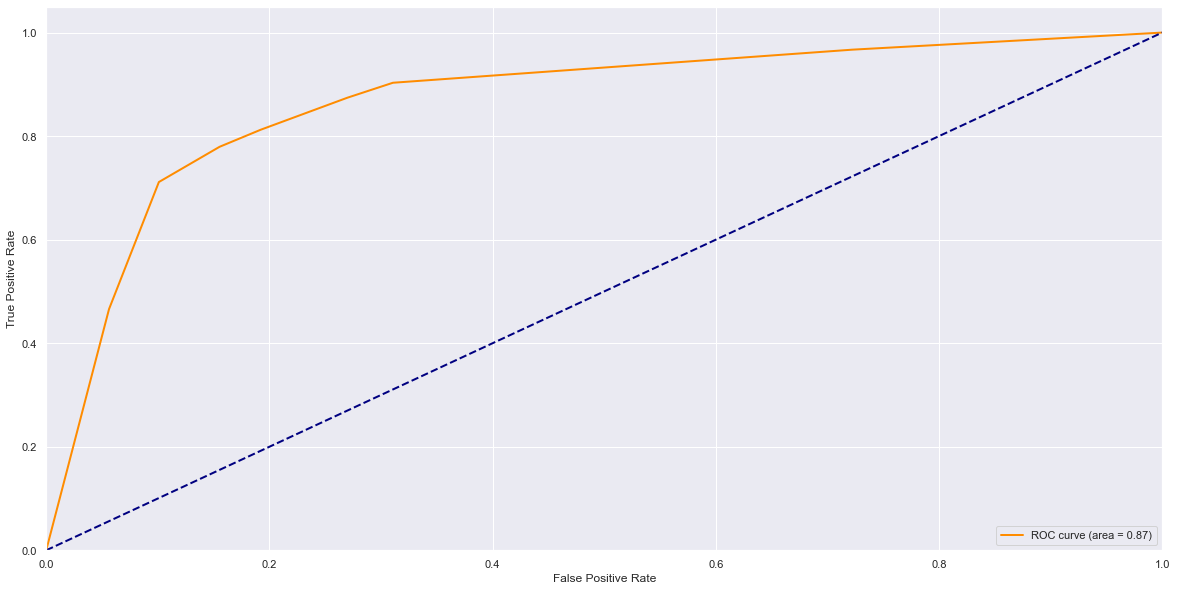

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(df_2.callwait, fitted.predict())
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()